In [ ]:
info = {
 "title": "Christmas Wreath",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.9.0",
 "dimensions": (1080, 1080)
}

In [1]:
import numpy as np
import numpy.random as npr
from math import pi

from stylo.domain.transform import translate, rotate
from stylo.color import FillColor
from stylo.shape import Shape, Circle, Rectangle
from stylo.image import LayeredImage
from stylo.math import lerp

In [2]:
bglight = FillColor("ffffdd")
bgdark = FillColor("fefeed")
lightgreen = FillColor("00aa00")

red = FillColor("cc0000")
green = FillColor("008800")
brightred = FillColor("ff0000")

black = FillColor()

darkred = FillColor("dd0000")
darkgreen = FillColor("006600")

In [3]:
class Pattern(Shape):
    
    def __init__(self, invert=False):
        self.invert = invert
    
    def draw(self):
        def pattern(x, y):
            
            stripes = np.abs(y % 0.1) < 0.05
            
            if self.invert:
                return np.logical_not(stripes)
            
            return stripes

        return pattern
    
class Leaf(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale

    def draw(self):
        
        def leaf(x, y):
            
            x = x/self.scale
            y = y/self.scale
            
            xs = x / 2.5
            
            above = y > xs*xs - 1
            below = y < 1 - xs*xs
            
            return np.logical_and(above, below)
        
        return leaf   
    
class Bell(Shape):
    
    def __init__(self, scale=1):
        self.scale = scale
    
    def draw(self):
        
        top = Circle(y=0.47, r=0.12, fill=True)
        
        def bell(x, y):
            
            x = x / self.scale
            y = y / self.scale
            
            mx = np.abs(x)
            t = top(x=x, y=y)
            
            curve = np.logical_and(y > 0.1, y*10 < np.exp(-12*(mx - 0.25)))
            curve = np.logical_and(curve, mx < 0.25)
            curve = np.logical_and(curve, y < 0.5)
            
            return np.logical_or(t, curve)
        
        return bell
            

In [4]:
pattern = Pattern() >> rotate(pi/4)
pattern1 = Pattern(invert=True) >> rotate(pi/4)

bell = Bell(scale=0.6) >> rotate(pi/4) >> translate(-0.28, -0.8)
bell_o = Bell(scale=0.63) >> rotate(pi/4) >> translate(-0.29, -0.81)

bell2 = Bell(scale=0.6) >> rotate(-pi/4) >> translate(0.28, -0.8)
bell_o2 = Bell(scale=0.63) >> rotate(-pi/4) >> translate(0.29, -0.81)

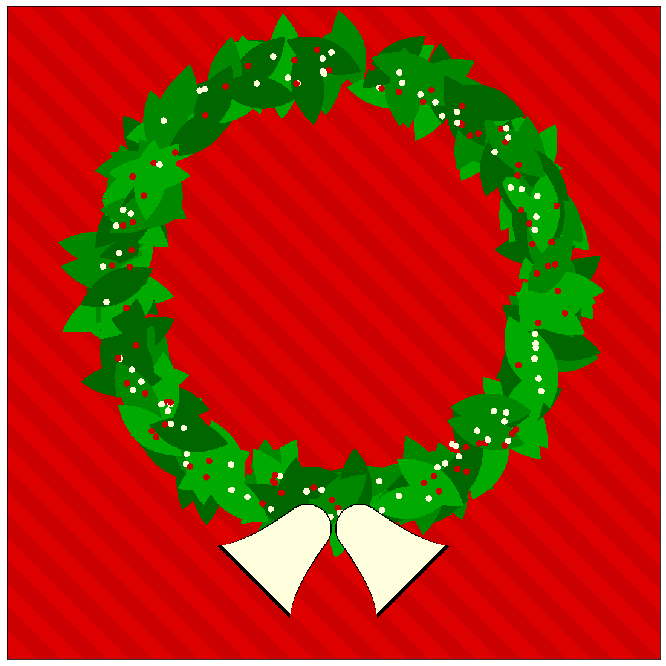

In [5]:
image = LayeredImage()

image.add_layer(pattern, darkred)
image.add_layer(pattern1, red)

def position(t, dr):
    r = 0.7 + dr
    return (r * np.cos(t*pi), 0.15 + r * np.sin(t*pi))

npr.seed(512)
ts = lerp(-1, 1)
displacement = lerp(-0.03, 0.03)
angle = lerp(-pi, pi)

count = -1

for c, t, s in ts(npr.rand(200, 3)):
    count += 1
    dr = displacement(s)
    leaf = Leaf(scale=0.05) >> rotate(angle(t)) >> translate(*position(c, dr))
    
    color = darkgreen
    
    if count % 2 == 0:
        color = green
        
    if count % 3 == 0:
        color = lightgreen
        
    image.add_layer(leaf, color)
    
npr.seed(2048)

for a, b, s, t in ts(npr.rand(75, 4)):
    
    dr, dt = displacement(a), displacement(s)
    
    x, y = position(t, dr)
    u, v = position(b, dt)
    
    bead1 = Circle(x=x, y=y, r=0.01, fill=True)
    bead2 = Circle(x=u, y=v, r=0.01, fill=True)
    
    image.add_layer(bead1, red)
    image.add_layer(bead2, bglight)
    
image.add_layer(bell_o, black)
image.add_layer(bell, bglight)
    
image.add_layer(bell_o2, black)
image.add_layer(bell2, bglight)

image(1080, 1080)